In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

train_path = "mnist_train.csv"
data = pd.read_csv(train_path)
data.describe()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [2]:
#https://www.kaggle.com/rahuldshetty/mnist-hand-written-digit-classification
data = data.values
y = data[:,0]
x = data[:,1:]
print(y.shape,x.shape)

(60000,) (60000, 784)


In [3]:
#reshaping into 3D
x = x.reshape((-1,28,28,1))

In [4]:
print(x.shape)

(60000, 28, 28, 1)


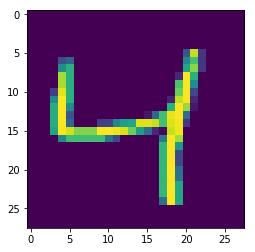

In [8]:
import cv2
import matplotlib.pyplot as plt

def display(image):
    plt.imshow(image)
    plt.show()
    
#reshaping into 2d shape to show in image    
sample  = x[2].reshape((28,28))
display(sample)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense,ReLU,Conv2D,MaxPooling2D,Activation,Flatten,Dropout,BatchNormalization

Using TensorFlow backend.


In [10]:
#sequential api used for connection of layers piecewise
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),name='0'))
#after paddding size= (n+2p-f+1)=same as 16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
# output layer after max pooling is divide by 2 of i/p
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',name='1'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',name='2'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',name='3'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
# 4  convolution kernel layers that is convolved with the layer input to produce a tensor of outputs. 

model.add(Flatten())

model.add(Dense(64))
#64 neurons
model.add(Activation('relu'))
model.add(Dropout(0.29))
#Dropout: A Simple Way to Prevent Neural Networks from Overfitting
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.21))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
0 (Conv2D)                   (None, 28, 28, 16)        160       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
1 (Conv2D)                   (None, 14, 14, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
__________

In [11]:

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#since categoraical loss function sued so we need o/p in categorical format

In [12]:
from keras.utils import to_categorical
y = to_categorical(y)#scaling it such that 9 digit doesn't get higher priority than 1 for o/p .

In [13]:
y.shape

(60000, 10)

In [14]:
history = model.fit(x,y,validation_split=0.2,epochs = 18,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/18
48000/48000 [==============================] - 227s 5ms/step - loss: 0.5512 - acc: 0.8272 - val_loss: 0.0840 - val_acc: 0.9808
Epoch 2/18
48000/48000 [==============================] - 212s 4ms/step - loss: 0.1740 - acc: 0.9565 - val_loss: 0.0832 - val_acc: 0.9812
Epoch 3/18
48000/48000 [==============================] - 228s 5ms/step - loss: 0.1326 - acc: 0.9689 - val_loss: 0.0689 - val_acc: 0.9860
Epoch 4/18
48000/48000 [==============================] - 207s 4ms/step - loss: 0.1125 - acc: 0.9740 - val_loss: 0.0588 - val_acc: 0.9888
Epoch 5/18
48000/48000 [==============================] - 217s 5ms/step - loss: 0.0950 - acc: 0.9770 - val_loss: 0.0708 - val_acc: 0.9871
Epoch 6/18
48000/48000 [==============================] - 227s 5ms/step - loss: 0.0813 - acc: 0.9807 - val_loss: 0.0512 - val_acc: 0.9907
Epoch 7/18
48000/48000 [==============================] - 225s 5ms/step - loss: 0.0776 - acc: 0.9827 - val_loss: 0.0700 - 

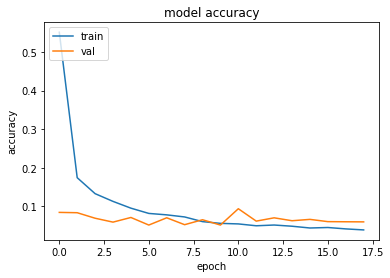

In [15]:
model.save('model.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


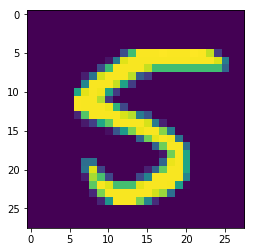

5


In [20]:
def get_result(image):
    # image should be 28x28x1 with [0-1] values
    images = np.array([image])
    res = list(model.predict(images)[0])
    mx = max(res)
    return res.index(mx)
idx = 960
sample = x[idx]
print(y[idx])
display(sample.reshape(28,28))
print(get_result(sample))